In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels.formula.api as smf
from scipy import stats

In [5]:
s = pd.read_csv(r'C:\Users\HOME\Python\DataFiles\Weather Station Locations.csv')
s


,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333
5,11604,ST JOHNS/COOLIDGE FIELD,AT,1707N,06147W,10,17.116667,-61.733333
6,82502,AMBERLY,AU,2736S,15243E,27,-27.600000,152.816667
7,82501,ARCHER,AU,2735S,15301E,19,-27.583333,153.000000
8,82506,BRISBANE,AU,2726S,15305E,2,-27.433333,153.133333
9,82402,CHARLEVILLE,AU,2625S,14616E,300,-26.416667,146.216667


In [6]:
type(s)

pandas.core.frame.DataFrame

In [8]:
s.shape

(161, 8)

In [9]:
s.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [10]:
s.describe()

,WBAN,ELEV,Latitude,Longitude
count,161.000000,161.000000,161.000000,161.000000
mean,33421.440994,439.850932,20.347205,8.364182
std,20826.534394,1745.422339,21.042992,87.420419
min,10001.000000,1.000000,-27.600000,-175.000000
25%,13601.000000,9.000000,8.233333,-60.850000
50%,32906.000000,27.000000,22.333333,9.083333
75%,34150.000000,98.000000,36.116667,67.250000
max,82506.000000,9999.000000,67.016667,177.366667


In [12]:
s[s.ELEV > 150]

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333
9,82402,CHARLEVILLE,AU,2625S,14616E,300,-26.416667,146.216667
10,82403,CLONCURRY,AU,2041S,14030E,188,-20.683333,140.583333
12,82404,LONGREACH,AU,2327S,14408E,187,-23.450000,144.066667
28,10806,SAN JOSE,CS,0954N,08408W,1132,9.900000,-84.000000
32,11615,CIUDAD TRUJILLO,DR,1829N,06954W,9999,18.483333,-69.883333
39,31302,ERITREA,ET,1517N,03855E,2326,15.283333,38.900000
53,11901,GUATEMALA CITY,GU,1435N,09032W,1486,14.583333,-90.550000


In [13]:
s.columns

Index(['WBAN', 'NAME', 'STATE/COUNTRY ID', 'LAT', 'LON', 'ELEV', 'Latitude',
       'Longitude'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1EAB162E8>,
      dtype=object)

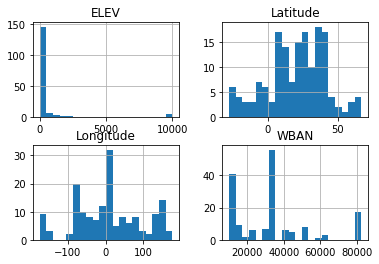

In [15]:
s.hist(bins=20)

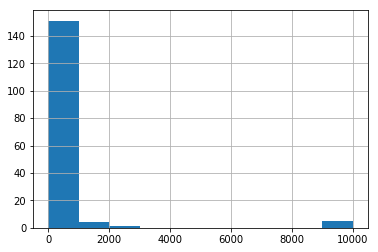

In [16]:
s["ELEV"].hist()

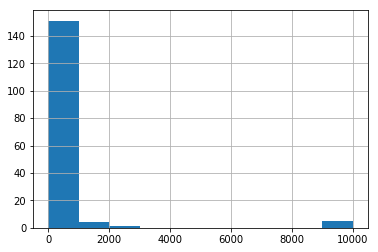

In [17]:
s.ELEV.hist()

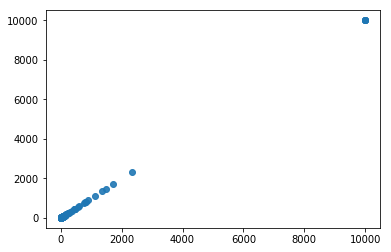

In [19]:
plt.scatter(s.ELEV, s.ELEV,  alpha=0.9)

In [22]:
s.corr(method='pearson')

,WBAN,ELEV,Latitude,Longitude
WBAN,1.000000,-0.175145,-0.549497,0.620293
ELEV,-0.175145,1.000000,-0.037603,-0.050088
Latitude,-0.549497,-0.037603,1.000000,-0.115382
Longitude,0.620293,-0.050088,-0.115382,1.000000


In [24]:
linear_model = smf.ols(formula='WBAN ~ ELEV', data=s).fit()

In [25]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WBAN   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     5.032
Date:                Wed, 07 Aug 2019   Prob (F-statistic):             0.0263
Time:                        10:48:02   Log-Likelihood:                -1826.4
No. Observations:                 161   AIC:                             3657.
Df Residuals:                     159   BIC:                             3663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.434e+04   1672.056     20.538      0.000     3.1e+04    3.76e+04
ELEV          -2.0899      0.932     -2.243      0.026      -3.930      -0.250
==============================================================================
Omnibus:                       25.298   Durbin-Watson:                   0.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.813
Skew:                           1.056   Prob(JB):                     1.24e-07
Kurtosis:                       3.534   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
print(type(linear_model.pvalues))
print(linear_model.pvalues)
print(linear_model.pvalues['ELEV'])

<class 'pandas.core.series.Series'>
Intercept    1.378597e-46
ELEV         2.626731e-02
dtype: float64
0.026267305499507947


In [28]:
s_predicted = linear_model.predict(s.ELEV)

In [29]:
s_predicted

0      33063.764915
1      34156.757071
2      34292.597396
3      32764.916199
4      33414.859910
5      34319.765462
6      34284.237992
7      34300.956801
8      34336.484271
9      33713.708625
10     33947.771955
11     34315.585759
12     33949.861806
13     34323.945164
14     34313.495908
15     34225.722159
16     34300.956801
17     34328.124866
18     34338.574122
19     34225.722159
20     34280.058290
21     34261.249629
22     34292.597396
23     34236.171415
24     34321.855313
25     34242.440969
26     34313.495908
27     34328.124866
28     31974.952461
29     34334.394420
           ...     
131    34102.420941
132    34334.394420
133    34336.484271
134    34229.901862
135    34223.632308
136    34296.777099
137    34321.855313
138    34292.597396
139    34307.226355
140    34319.765462
141    34330.214717
142    34311.406057
143    34290.507545
144    34294.687248
145    32635.345427
146    34292.597396
147    34156.757071
148    34294.687248
149    34296.777099


In [30]:
intercept = linear_model.params[0]
slope = linear_model.params[1]


plt.scatter(s.ELEV, s_predicted, color='m')
plt.scatter(s.ELEV, s.ELEVc, color='c')
plt.plot(salary_data.YearsExperience, salary_predicted, color='y')
#plt.plot(salary_data.YearsExperience, salary_data.Salary, color='b')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

AttributeError: 'DataFrame' object has no attribute 'YearsExperience'

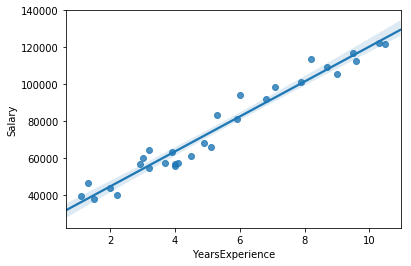

In [33]:
sns.regplot(x='YearsExperience', y='Salary', data=salary_data)